# Week 5 Discovering Patterns Clusters and Topics

YIMIN LI

## <span style="color:red">*Pitch Your Project*</span>

<span style="color:red">In the three cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words), **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words), and **HOW** you plan to investigate it (i.e., what are the approaches and operations you plan to perform, in sequence, to yield this insight) (<400 words).

# ***What?*** 
<200 words

In this proect, We trying to analyze Amazon reviews text and see how we can extract effective information from huge amount of reviews by text analysis and generate a high-level summary of the reviews by using deep learning. Apart from that, we intended to use learning algorithm to train the review with different weights and find features that are most helpful to calculate the weights of the reviews. Apart from that, we intend to run experiments to see whether our new algorithms have some sort of improvement.

## ***Why?***
<200 words

Using our new methods to summarize Amazon reviews can not only provide abundant, high-level information to the buyers instead of viewing huge amount of reviews, but also provides a new training algorithm that might be helpful to calculate the weights on online review website, which is helpful to extrapolate to other online platforms (e.g. Yelp) to help readers to catch information much more efficiently.

## ***How?***
<400 words

This project combines a list of methods including content analysis, machine learning, deep learning etc. and it would cover abundant techniques learnt from Computational Content Analysis. After cleaning the data from Amazon Review Data, we would apply feature selection / machine learning models to test which feature of the review text might play a more important role on consumers’ purchase decision. After that, we would use deep learning models to train text generation algorithm and generate the new, high-level summaries that match consumers’ needs and can summarize the huge amount of comments to a much more concise one. Finally, if time permitted, we would recruit coders to manually test whether our new summaries would be helpful or not.

## <span style="color:red">*Pitch Your Sample*</span>

<span style="color:red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors you about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication) beyond this class? (<300 words).


## ***Which (words)?***
<300 words

We would use Amazon Review Data (2018, https://nijianmo.github.io/amazon/index.html) as our main dataset for content analysis. It is a huge dataset released by UCSD researchers with a total number of reviews of 233.1 million ranging from 1996 to 2018. Among the huge dataset, we chose three sub-categories (Electronics, Pet Supplies, Video Games) for further content analysis with a total review number of 9.35 million reviews. This dataset provides us with abundant information for content analysis, including reviews’ summary, reviews’ text, overall score, product ID, product price etc., functioning as the natural experiment for our content analysis.

In terms of virtues and limitations, we would train a learning model and apply it to the final summary generation, which might be super helpful for the buyers. Although it might have limitations such as reviews written by different reviwers might be much more difficult to discover pattern than a long, whole paragraph written by one author, however, we believe we can overcome this problem by excellently (hopefully) training our learning algorithm.

Apart from data retrieved from Amazon reviews, we can also extrapolate it to other online review platform (i.e. Yelp) to grab the high-level pattern of it. We intend to provide a new, helpful, high-level summary retrieved from the huge amount of reviews we have, which is quite time-saving and straightforward for the buyers. 

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that construct features and cluster your documents using K-means and a variety of cluster numbers. Interrogate the cluster contents in terms of both documents and features. Identify the "optimal" cluster number with Silhouette analysis. Plot clusters and features after reducing with PCA. What does this cluster structure reveal about the organization of documents in your corpora? 

In [127]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas as pd #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

We first load our Amazon data (with first 5000 lines) retrieved from the whole dataset.

In [128]:
df = pd.read_csv("first5000.csv")
print(df.shape)
df.head()

(5000, 12)


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 17, 2015",A1HP7NVNPFMA4N,700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4,False,"07 27, 2015",A1JGAP0185YJI6,700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3,True,"02 23, 2015",A1YJWEXHQBWK2B,700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2,True,"02 20, 2015",A2204E1TH211HT,700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5,True,"12 25, 2014",A2RF5B5H74JLPE,700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


asin is the unique identifier for Amazon goods and we use it to identify the Amazon product ID.

In [129]:
tbl = df.groupby('asin').agg({'overall':'count'})
tbl = tbl.sort_values(by = ['overall'], ascending = False)
tbl['asin'] = tbl.index
tbl = tbl.rename_axis("ID")
tbl[:10]

,overall,asin
ID,,
B00000JRSB,300,B00000JRSB
B00000DMB3,190,B00000DMB3
B00000K2R4,175,B00000K2R4
B00000F1GM,169,B00000F1GM
B00000INR2,137,B00000INR2
B00000DMAT,117,B00000DMAT
9629971372,117,9629971372
B00000DMAX,113,B00000DMAX
B00001IVRD,111,B00001IVRD


We manually select the five top-appeared asin code for classifcation that We want the best classification to be 5

In [165]:
df = df[df['asin'].isin(list(tbl['asin'][:5]))]
df.index = np.arange(0,df.shape[0],1)
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,kmeans_predictions
0,5,True,"09 8, 2017",A6S4B1KIGT8MT,B00000DMB3,Rawlie,Very good,Five Stars,1504828800,NaN,{'Format:': ' Video Game'},NaN,0
1,5,True,"08 5, 2017",A2DV881DHBW4BF,B00000DMB3,Michael V.,Only the best Videogame of all time for nearly...,"Best game, best console",1501891200,NaN,{'Format:': ' Video Game'},NaN,0
2,5,True,"07 20, 2017",A3QP5LXSYITITG,B00000DMB3,Jason N.,Very happy,Five Stars,1500508800,NaN,{'Format:': ' Video Game'},NaN,0
3,3,True,"05 17, 2017",A2TB80WDNW7HPA,B00000DMB3,Chris,I gave it to my daughter and she loves it. Th...,Five Stars,1494979200,NaN,{'Format:': ' Video Game'},NaN,0
4,5,True,"04 19, 2017",A1ZC3X9ASS4GJ3,B00000DMB3,El Du33,Is ariving in good condition.,Five Stars,1492560000,NaN,{'Format:': ' Video Game'},NaN,0


In [131]:
#First it needs to be initialized
ngCountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
#Then trained
newsgroupsVects = ngCountVectorizer.fit_transform(df['reviewText'])
print(type(newsgroupsVects))
print(newsgroupsVects.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(971, 9278)


In [132]:
newsgroupsVects

<971x9278 sparse matrix of type '<class 'numpy.int64'>'
	with 82277 stored elements in Compressed Sparse Row format>

In [133]:
newsgroupsVects[:10,:20].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

We first use tf-idf method to weight document-distinguishing words

In [134]:
#initialize
newsgroupsTFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(newsgroupsVects)
#train
newsgroupsTF = newsgroupsTFTransformer.transform(newsgroupsVects)
print(newsgroupsTF.shape)

(971, 9278)


In [135]:
list(zip(ngCountVectorizer.vocabulary_.keys(), newsgroupsTF.data))[:20]

[('very', 0.7455271378426536),
 ('good', 0.6664752709141886),
 ('only', 0.20435909402402086),
 ('the', 0.38231497033947515),
 ('best', 0.1927112635637852),
 ('videogame', 0.14124660741496914),
 ('of', 0.08248332938359998),
 ('all', 0.39111700569683205),
 ('time', 0.16947931104748326),
 ('for', 0.1256085526601782),
 ('nearly', 0.13048065275585835),
 ('almost', 0.1913251744328473),
 ('20', 0.31270277806562147),
 ('years', 0.14103431303306374),
 ('in', 0.17818817699200742),
 ('row', 0.11039824637053881),
 ('on', 0.10664531320293283),
 ('one', 0.24124748300228505),
 ('my', 0.16325607496450475),
 ('most', 0.21198470288104138)]

After that, we tried to include some limitations: max_features = 1000, min_df = 3 along with stop_words

In [136]:
#re-initialize
ngTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
newsgroupsTFVects = ngTFVectorizer.fit_transform(df['reviewText'])

In [137]:
newsgroupsTFVects

<971x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 33496 stored elements in Compressed Sparse Row format>

In [138]:
#initialize
newsgroupsTFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(newsgroupsTFVects)
#train
newsgroupsTF = newsgroupsTFTransformer.transform(newsgroupsTFVects)
print(newsgroupsTF.shape)
list(zip(ngTFVectorizer.vocabulary_.keys(), newsgroupsTF.data))[:20]

(971, 1000)


[('good', 1.0),
 ('best', 0.1296122194182659),
 ('time', 0.12190580873494232),
 ('nearly', 0.5974916335107104),
 ('20', 0.5868189169023269),
 ('years', 0.2551856722192251),
 ('favorite', 0.3556263489822735),
 ('console', 0.2745853703823173),
 ('happy', 1.0),
 ('gave', 0.47298449650271546),
 ('isn', 0.2899817591510618),
 ('working', 0.4976054643001148),
 ('won', 0.3065005145568145),
 ('save', 0.3065005145568145),
 ('spend', 0.506655619212115),
 ('condition', 0.229128305466618),
 ('love', 0.9733962295149886),
 ('fairy', 1.0),
 ('world', 0.07582249480137836),
 ('forest', 0.035456296323414856)]

As we can see, if we add on some limitations and constraints, the vocabularies as well as the tf-idf score are different from those without the limitations.

## Flat clustering with K-means

In [139]:
# We don't know the clustering number but just guess
numClusters = 5

In [140]:
#k-means++ is a better way of finding the starting points
#We could also try providing our own
km = sklearn.cluster.KMeans(n_clusters=numClusters, init='k-means++')
km.fit(newsgroupsTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [141]:
df['kmeans_predictions'] = km.labels_
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,kmeans_predictions
706,5,True,"09 8, 2017",A6S4B1KIGT8MT,B00000DMB3,Rawlie,Very good,Five Stars,1504828800,NaN,{'Format:': ' Video Game'},NaN,0
707,5,True,"08 5, 2017",A2DV881DHBW4BF,B00000DMB3,Michael V.,Only the best Videogame of all time for nearly...,"Best game, best console",1501891200,NaN,{'Format:': ' Video Game'},NaN,0
708,5,True,"07 20, 2017",A3QP5LXSYITITG,B00000DMB3,Jason N.,Very happy,Five Stars,1500508800,NaN,{'Format:': ' Video Game'},NaN,0
714,3,True,"05 17, 2017",A2TB80WDNW7HPA,B00000DMB3,Chris,I gave it to my daughter and she loves it. Th...,Five Stars,1494979200,NaN,{'Format:': ' Video Game'},NaN,0
715,5,True,"04 19, 2017",A1ZC3X9ASS4GJ3,B00000DMB3,El Du33,Is ariving in good condition.,Five Stars,1492560000,NaN,{'Format:': ' Video Game'},NaN,0


In [183]:
print("For our clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(df['asin'], km.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(df['asin'], km.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(df['asin'], km.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(df['asin'], km.labels_)))

For our clusters:
Homogeneity: 0.391
Completeness: 0.448
V-measure: 0.417
Adjusted Rand Score: 0.276


In [142]:
terms = ngTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 games
 good
 play
 n64
 expansion
 great
 love
 perfect
 just
 buy


Cluster 1:
 final
 fantasy
 time
 story
 zelda
 best
 characters
 rpg
 just
 good


Cluster 2:
 dreamcast
 sega
 games
 ps2
 console
 great
 like
 dc
 sonic
 playstation


Cluster 3:
 mario
 64
 super
 stars
 nintendo
 n64
 games
 fun
 3d
 bowser


Cluster 4:
 works
 great
 condition
 fine
 perfect
 arrived
 came
 described
 good
 love




Then, we visualize our results of the clustering.

In [143]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(newsgroupsTFVects.toarray())
reduced_data = pca.transform(newsgroupsTFVects.toarray())

In [144]:
components = pca.components_
keyword_ids = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
words = [terms[i] for i in keyword_ids]#Turn the ids into words.
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]

Since we have already known there are only five products, and we hopefully the classifier can be classified based on that

In [145]:
ls_asin = list(tbl['asin'][:5])
colordict_true = {
ls_asin[0]: 'red',
ls_asin[1]: 'orange',
ls_asin[2]: 'green',
ls_asin[3]: 'blue',
ls_asin[4]: 'yellow'
     }

colors_true = [colordict_true[c] for c in df['asin']]

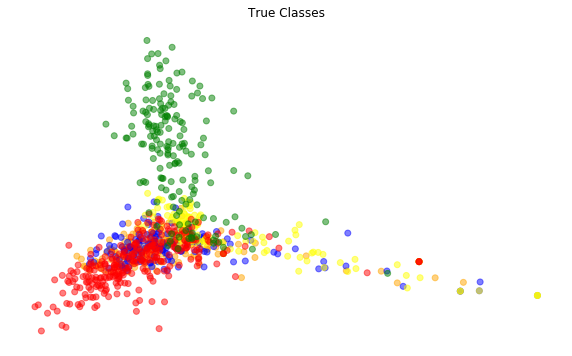

In [146]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors_true, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

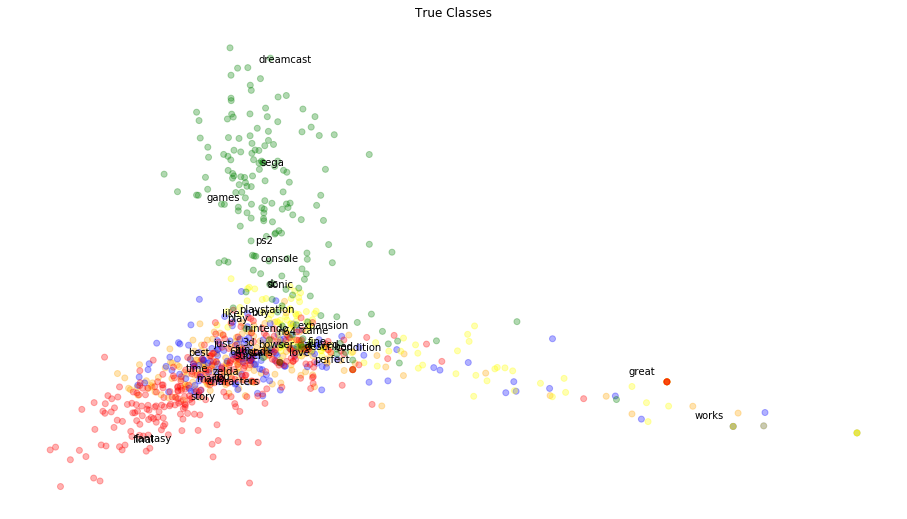

In [147]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors_true, alpha = 0.3, label = colors)
for i, word in enumerate(words):
    ax.annotate(word, (x[i],y[i]))
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

Then, we made the prediction for our results.

In [148]:
colordict = {
0: 'red',
1: 'orange',
2: 'green',
3: 'blue',
4: 'yellow'
     }
colors = [colordict[c] for c in df['kmeans_predictions']]

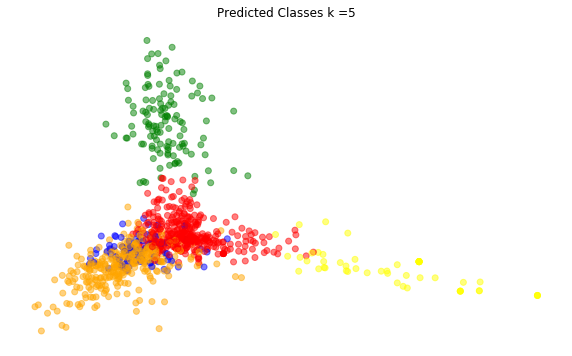

In [149]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Classes k =5')
plt.show()

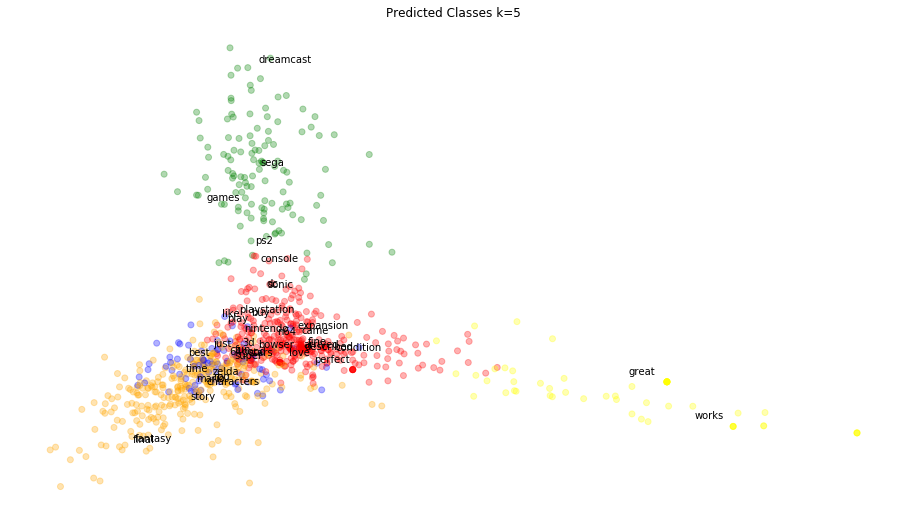

In [150]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], color = colors, alpha = 0.3, label = colors)
for i, word in enumerate(words):
    ax.annotate(word, (x[i],y[i]))
plt.xticks(())
plt.yticks(())
plt.title('Predicted Classes k=5')
plt.show()

As we seen from two graphs above, our trained classifier performs excellent in making the prediction, which is quite match with our true data which is classified based on the unique "asin" identifier.

## Selecting Cluser Number

In [151]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


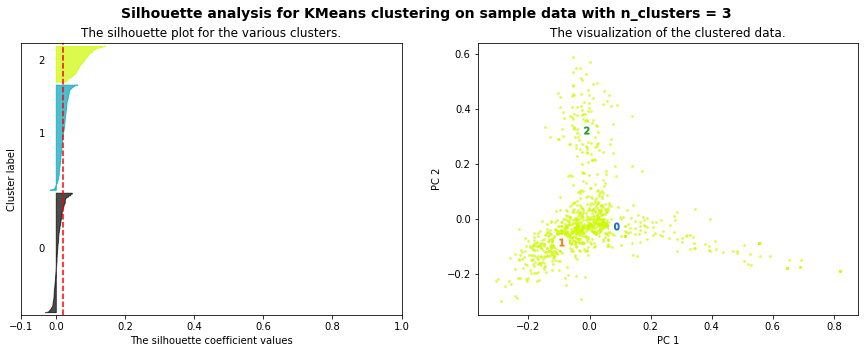

For n_clusters = 3, The average silhouette_score is : 0.021


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


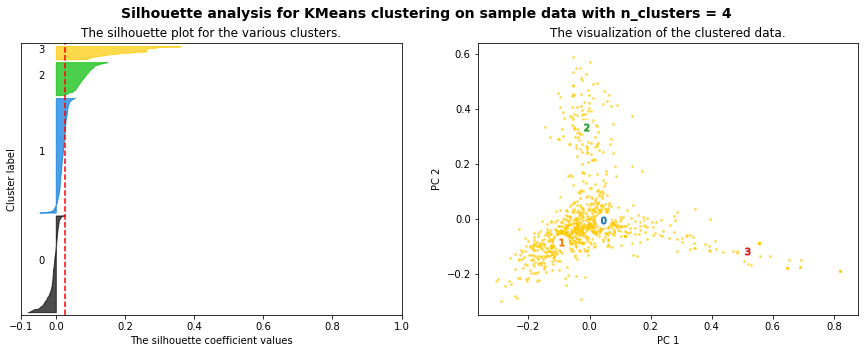

For n_clusters = 4, The average silhouette_score is : 0.026


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


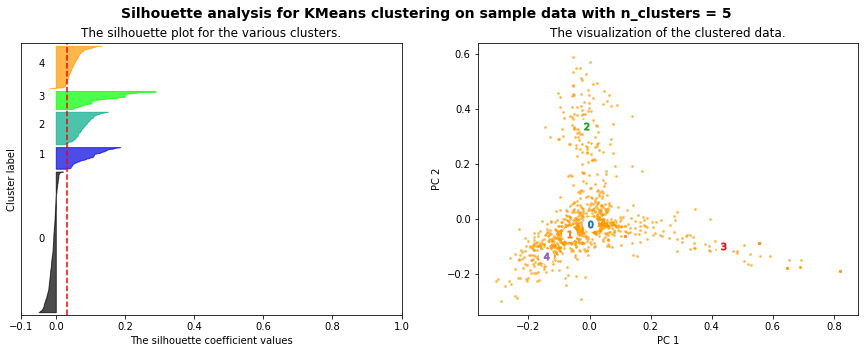

For n_clusters = 5, The average silhouette_score is : 0.031


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


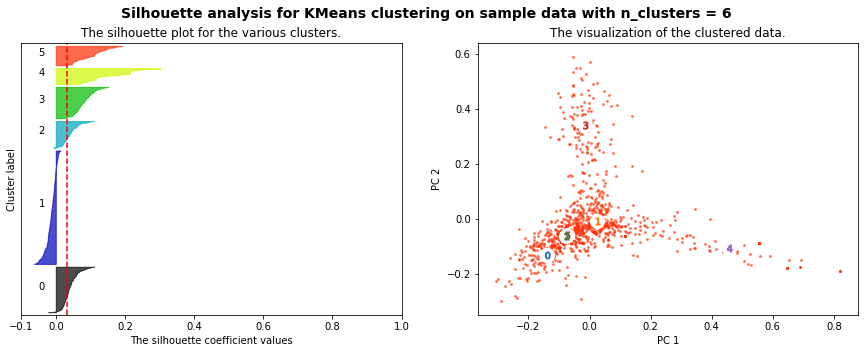

For n_clusters = 6, The average silhouette_score is : 0.034


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


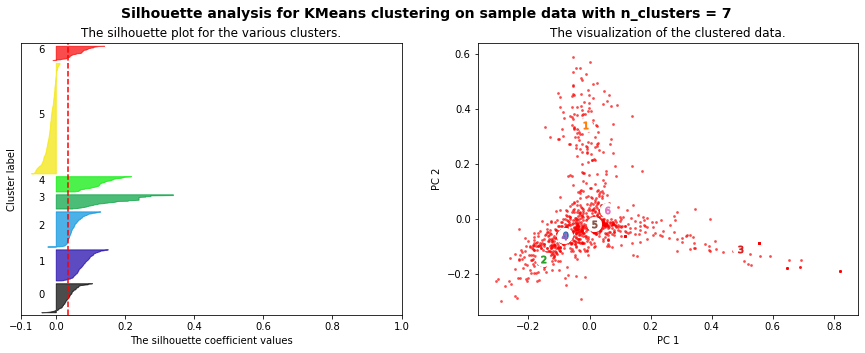

For n_clusters = 7, The average silhouette_score is : 0.036


In [152]:
for i in range(3, 8, 1):
    X = newsgroupsTFVects.toarray()
    plotSilhouette(i, X)

As we can see from the graph above, the average silhouette score increases as number of classifers increase. In a range of [3, 7], classifer=7 functions best, which is better than our hypothesis of five "asin" unique identifier. This shows that it might be difficult to classify a review based on the product ("asin" code), which means there are huge hegemonity across different products in a certain category (Note: All products came from Video Game Category.) So, in this circumstances, it makes sense that classifers function better as n increases.

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that hierarchically cluster your documents using two approaches, and visualize them with a tree. Interrogate the recursive cluster contents in terms of both documents and closenesses. What does this nested cluster structure reveal about the organization of documents in your sampled corpora? Moreover, if they do worse than kmeans (as above), why do you think this is the case (hint: using metrics if you have ground truth or silhouette if you do not)? 

<span style="color:red">***Stretch***: Attempt using different distances into your clustering algorithms. (How) do they change the arrangement of clusters?

### Hierarchical Clustering with Wald's Method

In [166]:
newsgroupsTFVects

<971x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 33496 stored elements in Compressed Sparse Row format>

In [167]:
newsgroupsTFVects[:50].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [168]:
newsgroupsCoocMat = newsgroupsTFVects * newsgroupsTFVects.T
#set the diagonal to 0 since we don't care how similar texts are to themselves
newsgroupsCoocMat.setdiag(0)
#Another way of relating the texts is with their cosine similarity
#newsgroupsCosinMat1 = 1 - sklearn.metrics.pairwise.cosine_similarity(newsgroupsTFVects)
#But generally word occurrence is more accurate


C:\Users\qmun\Anaconda3\lib\site-packages\scipy\sparse\_index.py:127: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [170]:
selectIndices = []
indexToCat = []
for c in set(df['kmeans_predictions']):
    selectIndices += list(df[df['kmeans_predictions'] == c].index)[:50]
    indexToCat += [c] * 50
    #.groupby('category').sum()

In [171]:
df[df['kmeans_predictions'] == 0]

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,kmeans_predictions
0,5,True,"09 8, 2017",A6S4B1KIGT8MT,B00000DMB3,Rawlie,Very good,Five Stars,1504828800,NaN,{'Format:': ' Video Game'},NaN,0
1,5,True,"08 5, 2017",A2DV881DHBW4BF,B00000DMB3,Michael V.,Only the best Videogame of all time for nearly...,"Best game, best console",1501891200,NaN,{'Format:': ' Video Game'},NaN,0
2,5,True,"07 20, 2017",A3QP5LXSYITITG,B00000DMB3,Jason N.,Very happy,Five Stars,1500508800,NaN,{'Format:': ' Video Game'},NaN,0
3,3,True,"05 17, 2017",A2TB80WDNW7HPA,B00000DMB3,Chris,I gave it to my daughter and she loves it. Th...,Five Stars,1494979200,NaN,{'Format:': ' Video Game'},NaN,0
4,5,True,"04 19, 2017",A1ZC3X9ASS4GJ3,B00000DMB3,El Du33,Is ariving in good condition.,Five Stars,1492560000,NaN,{'Format:': ' Video Game'},NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1,False,"06 8, 2001",APBMA8IB0FPQF,B00000K2R4,Kevin,"i thought this would be a good console, i was ...",horrible,991958400,3.0,NaN,NaN,0
941,5,False,"03 18, 2001",A1T1MWDY80A6BT,B00000K2R4,Amazon Customer,This is the best video game console I have eve...,Best Console I ever owned,984873600,4.0,NaN,NaN,0
951,5,False,"01 23, 2001",ASZESILQJP6XD,B00000K2R4,Amazon Customer,The slogan for this console is perfect. It of...,It's thinking.,980208000,NaN,NaN,NaN,0
954,5,False,"01 8, 2001",A37Z65SZVT0TVB,B00000K2R4,Amazon Customer,By now everyone is ravening about PSX2. Great ...,Best Buy for your Bucks,978912000,NaN,NaN,NaN,0


In [172]:
subCoocMat = newsgroupsCoocMat[selectIndices,:][:,selectIndices]
subCoocMat

<250x250 sparse matrix of type '<class 'numpy.float64'>'
	with 40262 stored elements in Compressed Sparse Row format>

In [173]:
linkage_matrix = scipy.cluster.hierarchy.ward(subCoocMat.toarray())
linkage_matrix[:10]

C:\Users\qmun\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([[  3.        ,  23.        ,   0.58703528,   2.        ],
       [ 21.        ,  54.        ,   0.58801016,   2.        ],
       [ 88.        ,  97.        ,   0.59164464,   2.        ],
       [225.        , 241.        ,   0.63383191,   2.        ],
       [ 13.        , 197.        ,   0.64517112,   2.        ],
       [ 62.        ,  64.        ,   0.66875138,   2.        ],
       [ 50.        ,  69.        ,   0.68045485,   2.        ],
       [ 67.        ,  71.        ,   0.68821277,   2.        ],
       [113.        , 131.        ,   0.69862311,   2.        ],
       [179.        , 189.        ,   0.70383318,   2.        ]])

Then, we visualize the tree

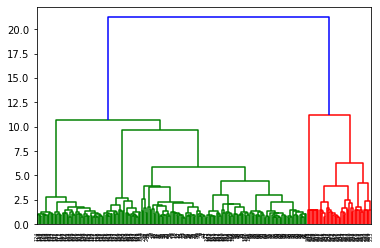

In [174]:
dendDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, get_leaves=True)

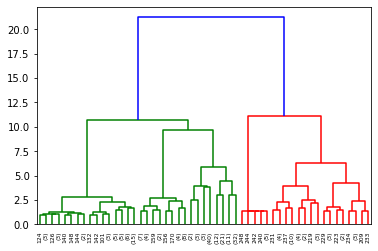

In [176]:
dendrogramDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, p=5, truncate_mode='level', get_leaves=True)

Compared with k-means

In [178]:
linkage_matrix_full = scipy.cluster.hierarchy.ward(newsgroupsCoocMat.toarray())
hierarchicalClusters_full = scipy.cluster.hierarchy.fcluster(linkage_matrix_full, 5, 'maxclust')

In [180]:
df['wald_predictions'] = hierarchicalClusters_full
df[['kmeans_predictions', 'wald_predictions']].head(20)

,kmeans_predictions,wald_predictions
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,1,5
7,0,1
8,4,2
9,0,1


In [184]:
print("For our complete clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(df['asin'], hierarchicalClusters_full)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(df['asin'], hierarchicalClusters_full)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(df['asin'], hierarchicalClusters_full)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(df['asin'], hierarchicalClusters_full)))

For our complete clusters:
Homogeneity: 0.313
Completeness: 0.365
V-measure: 0.337
Adjusted Rand Score: 0.222


As it seen before, these two methods almost have the exact same classification results based on our observations of first twenty results. Compared directly with k-means in terms of rand score, it is a little bit smaller, signifying that its results are not as consistent as the k-means with our classification given by the uniqueness of the products.

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that topic model documents related to your anticipated final project. Interrogate and visually plot (e.g., as a bar graph?) the topic-word loadings and the document-topic loadings. What does this topic structure reveal about the distribution of contents across your documents? Systematically vary the $\alpha$, $\eta$, and topic number of the model for your text and describe in detail whether and how these changes led to distinctive outcomes, visible to you as analyst.  

<span style="color:red">**Stretch**: Cluster your documents, but instead of using words alone, use their topic loadings as an additional set of features. Do these topic loadings increase the apparent semantic coherence of your clusters?</span> 

In [186]:
#Apply our functions
df['tokenized_text'] = df['reviewText'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
df['normalized_tokens'] = df['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [189]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

df['reduced_tokens'] = df['normalized_tokens'].apply(lambda x: dropMissing(x, ngTFVectorizer.vocabulary_.keys()))

In [190]:
dictionary = gensim.corpora.Dictionary(df['reduced_tokens'])

In [191]:
corpus = [dictionary.doc2bow(text) for text in df['reduced_tokens']]

In [193]:
# By doing so, it might be less time consuming especially for a large dataset
gensim.corpora.MmCorpus.serialize('amazon.mm', corpus)
senmm = gensim.corpora.MmCorpus('amazon.mm')

In [194]:
senlda = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

In [195]:
sen1Bow = dictionary.doc2bow(df['reduced_tokens'][0])
sen1lda = senlda[sen1Bow]
print("The topics of the text: {}".format(df['asin'][0]))
print("are: {}".format(sen1lda))

The topics of the text: B00000DMB3
are: [(0, 0.044716086), (1, 0.042614814), (2, 0.04775105), (3, 0.5636139), (4, 0.046577472), (5, 0.059094798), (6, 0.050898366), (7, 0.055773936), (8, 0.052008905), (9, 0.036950666)]


In [203]:
ldaDF = pandas.DataFrame({
        'name' : df['reviewerID'],
        'topics' : [senlda[dictionary.doc2bow(l)] for l in df['reduced_tokens']]
    })

In [204]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(senlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(senlda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

ldaDF[1::100]

,name,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
1,A2DV881DHBW4BF,"[(0, 0.014474387), (1, 0.013795179), (2, 0.015...",0.014474,0.013795,0.015458,0.013393,0.015078,0.864464,0.016479,0.018059,0.016838,0.011962
101,A9L4AQU51UF2D,"[(4, 0.20353214), (8, 0.7721985)]",0.000000,0.000000,0.000000,0.000000,0.203532,0.000000,0.000000,0.000000,0.772198,0.000000
201,AVXNFM24NAE6,"[(0, 0.014473951), (1, 0.013794827), (2, 0.015...",0.014474,0.013795,0.015459,0.013393,0.015079,0.019134,0.861812,0.018057,0.016836,0.011961
301,APS7IH14C8AZ9,"[(4, 0.55392116), (5, 0.43021652)]",0.000000,0.000000,0.000000,0.000000,0.553921,0.430217,0.000000,0.000000,0.000000,0.000000
401,A3J00EF7Y70G6K,"[(0, 0.029371535), (1, 0.027993267), (2, 0.031...",0.029372,0.027993,0.031368,0.027179,0.030597,0.038819,0.719596,0.036638,0.034166,0.024273
501,A2UILU1K5G869K,"[(0, 0.014474615), (1, 0.013794906), (2, 0.015...",0.014475,0.013795,0.015458,0.013393,0.015079,0.019137,0.016480,0.863384,0.016838,0.011961
601,A2A1HXFSAPA9A5,"[(6, 0.31941968), (8, 0.66059625)]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.319420,0.000000,0.660596,0.000000
701,A1KA46P9TRPIX7,"[(6, 0.7440506), (8, 0.24718714)]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.744051,0.000000,0.247187,0.000000
801,A343PNZZNYJBSI,"[(5, 0.942387)]",0.000000,0.000000,0.000000,0.000000,0.000000,0.942387,0.000000,0.000000,0.000000,0.000000
901,A19LYRIDIGEO13,"[(4, 0.95534134), (5, 0.013564358)]",0.000000,0.000000,0.000000,0.000000,0.955341,0.013564,0.000000,0.000000,0.000000,0.000000


Then, we visualize among the first 10 inputs.

In [205]:
ldaDFV = ldaDF[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN = ldaDF[:10][['name']]
ldaDFVis = ldaDFV.as_matrix(columns=None)
ldaDFVisNames = ldaDFVisN.as_matrix(columns=None)
ldaDFV

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.044714,0.042615,0.047751,0.563616,0.046577,0.059094,0.050898,0.055774,0.052009,0.036951
1,0.014474,0.013795,0.015458,0.013393,0.015078,0.864464,0.016479,0.018059,0.016838,0.011962
2,0.044714,0.042616,0.047754,0.041376,0.046580,0.581325,0.050902,0.055770,0.052011,0.036952
3,0.017419,0.016602,0.018603,0.016118,0.018146,0.836889,0.019831,0.021733,0.020263,0.014395
4,0.029374,0.027994,0.031368,0.027180,0.030597,0.724972,0.033438,0.036637,0.034166,0.024274
5,0.044714,0.042615,0.047757,0.041374,0.568742,0.059122,0.050905,0.055811,0.052009,0.036951
6,0.000000,0.000000,0.000000,0.000000,0.168744,0.000000,0.000000,0.822030,0.000000,0.000000
7,0.831296,0.016602,0.018603,0.016119,0.018146,0.023017,0.019831,0.021729,0.020261,0.014396
8,0.017419,0.016602,0.018602,0.016119,0.018145,0.836896,0.019831,0.021727,0.020263,0.014395
9,0.000000,0.000000,0.000000,0.000000,0.970423,0.000000,0.000000,0.000000,0.000000,0.000000


Bar Chart

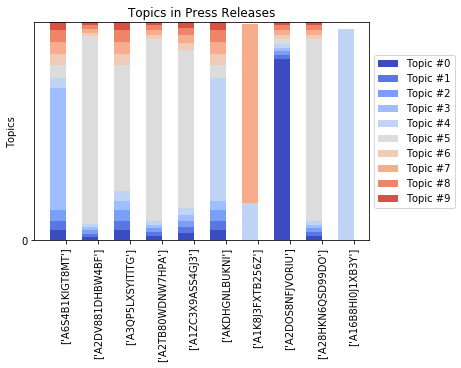

In [206]:
N = 10
ind = np.arange(N)
K = senlda.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Press Releases')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

Heat Map

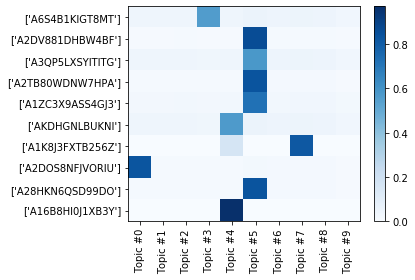

In [207]:
plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

In [208]:
senlda.show_topic(1)

[('time', 0.020334005),
 ('play', 0.019608509),
 ('graphic', 0.014053352),
 ('like', 0.013493971),
 ('mario', 0.012727763),
 ('world', 0.010809087),
 ('fun', 0.010638105),
 ('great', 0.010550079),
 ('zelda', 0.009908039),
 ('good', 0.009474753)]

In [209]:
topicsDict = {}
for topicNum in range(senlda.num_topics):
    topicWords = [w for w, p in senlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,fantasy,time,play,time,like,play,great,play,play,zelda
1,n64,play,great,good,play,time,final,time,time,time
2,good,graphic,like,like,time,character,story,mario,like,n64
3,dreamcast,like,dreamcast,play,dreamcast,great,time,final,graphic,mario
4,great,mario,graphic,dreamcast,zelda,good,like,fantasy,rpg,world
5,final,world,time,great,come,dreamcast,fantasy,like,character,great
6,play,fun,come,graphic,sega,like,play,dreamcast,great,dungeon
7,buy,great,story,mario,great,sega,character,zelda,think,think
8,zelda,zelda,sega,look,link,console,graphic,graphic,final,like
9,like,good,fantasy,beat,graphic,buy,vii,nintendo,good,come


We can see a great number of overlapping between different reviews among different topics, which quite make sense since different reviewers might have similar comments on the same product.

<Figure size 432x288 with 0 Axes>

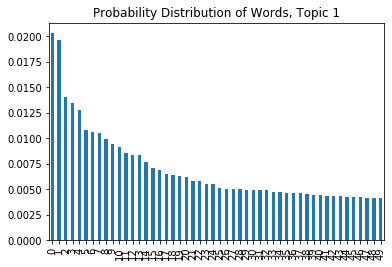

In [213]:
topic1_df = pandas.DataFrame(senlda.show_topic(1, topn=50))
plt.figure()
topic1_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1')
plt.show()

In [214]:
senlda1 = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=10, eta = 0.00001)
senlda2 = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=10, eta = 0.9)

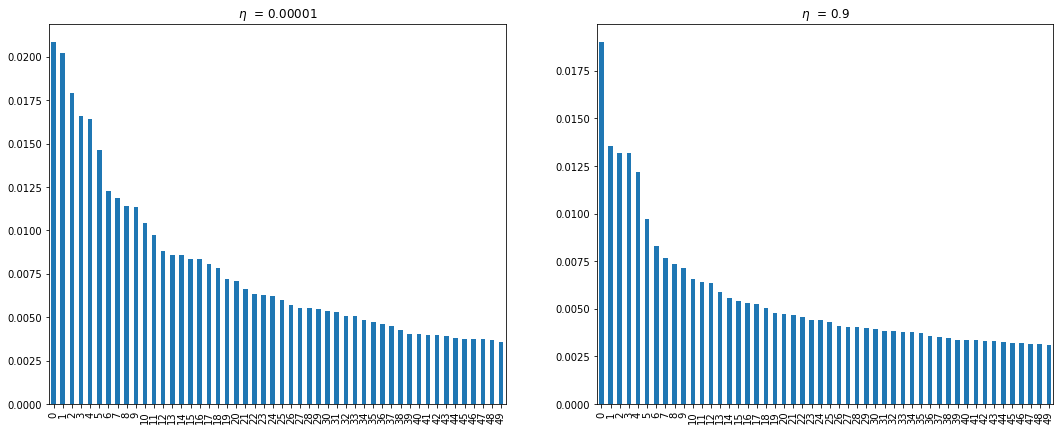

In [215]:
topic11_df = pandas.DataFrame(senlda1.show_topic(1, topn=50))
topic21_df = pandas.DataFrame(senlda2.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
topic11_df.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.00001')
topic21_df.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')
plt.show()

It doesn't seem excellently predicting our results by using these models mainly because these two reasons: First, most reviews are relatively short, and it really leaves nothing if reducing the tokens. Also, apart from this, since reviews are in the same cateogry of video games, it quite make sense that they are overlapping with each other, making it difficult to classify.



## <span style="color:red">*Exercise 4*</span>

<span style="color:red">Construct cells immediately below this that use topic models and networks, or dynamic topic models on datasets relevant to your final project. You can also extend the analysis of the COHA or Soap datasets, if relevant to the comparison of data for your projects. (You could possibly use coha_genres dictionary to conduct analysis on topic evolution for a particular genre? What themes do you see evolving throughout these corpora?)

### Topic Models and networks

In [216]:
corpora_address = "C:/Users/qmun/Desktop/SOAP"

In [217]:
soap_texts = lucem_illud_2020.loadDavies(corpora_address, num_files=2000)

text_0-tez.zip
text_1-teh.zip
text_2-wts.zip
text_3-pem.zip


In [218]:
import zipfile
import pandas as pd

In [219]:
zfile = zipfile.ZipFile(corpora_address + "/soap_sources.zip")
source = []

In [220]:
for file in zfile.namelist():
    with zfile.open(file) as f:
        for line in f:
            source.append(line)

In [221]:
soap_dict = {}

In [222]:
for soap in source[3:]:
    try:
        textID, year, show, url = soap.decode("utf-8").split("\t")
    except UnicodeDecodeError:
        continue
    if show.strip() not in soap_dict:
        soap_dict[show.strip()] = []
    if show.strip() in soap_dict:
        try:
            soap_dict[show.strip()].append(soap_texts[textID.strip()])
        except KeyError:
            continue

In [223]:
soap_dict.keys()

dict_keys(['All My Childen', 'As the World Turns', 'Bold and Beautiful', 'Days of Our Lives', 'General Hospital', 'Guiding Light', 'One Life to Live', 'Passions', 'Port Charles', 'Young and Restless'])

In [224]:
soap_df = pd.DataFrame(columns=["Soap Name", "Tokenized Texts"])
soap_df

,Soap Name,Tokenized Texts


In [225]:
i = 0

In [226]:
for soap in soap_dict:
    # since there were multiple lists
    print(soap)
    full_script = []
    for part in soap_dict[soap]:
        full_script = full_script + part
    soap_df.loc[i] = [soap, full_script]
    i += 1

All My Childen
As the World Turns
Bold and Beautiful
Days of Our Lives
General Hospital
Guiding Light
One Life to Live
Passions
Port Charles
Young and Restless


In [227]:
soap_df

,Soap Name,Tokenized Texts
0,All My Childen,"[@!Liza, You, 're, in, early, @!Ryan, Yeah, I,..."
1,As the World Turns,"[@!Katie, Simon, where, are, you, @!Simon, Kat..."
2,Bold and Beautiful,"[@!Morgan, What, 's, the, matter, Stephanie, Y..."
3,Days of Our Lives,"[@!Philip, Seems, like, every, time, I, look, ..."
4,General Hospital,"[@!Stefan, I, love, her, @!Jax, No, Cassadine,..."
5,Guiding Light,"[@!Reva, Well, it, 's, very, peaceful, Your, b..."
6,One Life to Live,"[@!Rae, What, She, even, has, a, new, friend, ..."
7,Passions,"[@!Kay, Going, to, get, pregnant, and, I, 'm, ..."
8,Port Charles,"[@!Jack, There, you, are, you, son, @!Chris, H..."
9,Young and Restless,"[@!Sharon, Yeah, I, could, n't, sleep, @!Victo..."


In [230]:
dool = soap_df['Tokenized Texts'][0]

In [231]:
' '.join(dool[0:1500])

"@!Liza You 're in early @!Ryan Yeah I had stuff to do I did n't expect to see you here either @!Liza I could n't sleep Want to tell me why you 're packing up your desk @!Ryan Oh I 'm leaving Liza This this was a mistake @!Liza Well that 's constructive @!Ryan Well there 's no reason for me to be here I mean I can get a job anywhere And since that 's the case I mean there 's no reason for me to be in this town too so I 'm just @!Liza So now you 're leaving your job and you 're leaving town @!Ryan Yes @!Liza Not one reason to stay nothing @!Ryan That 's right @!Liza One question @!Ryan What 's that @!Liza What about me @!Ryan Liza you can get a dozen guys to sell ad time like I do @!Liza I do n't really give a damn about the job What I said was what about a lot of things @!Gillian Well I do n't want to hear about it Just leave me alone @!Jesse Whoa whoa whoa Just settle down there little Miss Drama Queen I 'm just trying to tell you that you did the right thing last night at the Turret 

In [232]:
characters = {}
for token in dool:
    if token[0] == '@':
        # all characters or actions start with @, so we add that to character
        if token[2:] not in characters:
            characters[token[2:]] = 0
        if token[2:] in characters:
            characters[token[2:]] += 1

In [233]:
import networkx as nx

In [234]:
actor_network = nx.Graph()

In [235]:
for character in characters:
    if characters[character] > 2000:
        actor_network.add_node(character, lines_spoken= characters[character], words=[])

In [236]:
i = 0
all_texts = []

In [237]:
for token in dool:
    i += 1
    if i > len(dool):
        break
    if token[0] == "@":
        if token[2:] in actor_network.nodes():
            j = i
            for token_ in dool[i:]:
                if token_[0] == "@":
                    # if both the characters exist in the graph, add a weight
                    if token_[2:] != token[2:] and token_[2:] in actor_network.nodes():
                        if (token[2:], token_[2:]) not in actor_network.edges():
                            actor_network.add_edge(token[2:], token_[2:], weight=0)
                        if (token[2:], token_[2:]) in actor_network.edges():
                            actor_network.edges[(token[2:], token_[2:])]['weight'] += 1
                    break
                j += 1
            # adding characters sentences
            actor_network.nodes[token[2:]]['words'].append(dool[i:j])
            all_texts.append(lucem_illud_2020.normalizeTokens(dool[i:j]))

Then, we can draw the network graph as shown below

C:\Users\qmun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


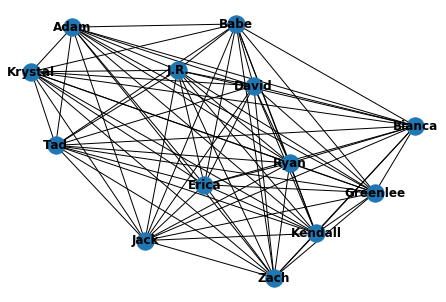

In [238]:
nx.draw(actor_network, with_labels=True, font_weight='bold')

After that, we would explore the words with high frequency as well as the heat map associated with it.

In [239]:
all_texts[0:10]

[['yes', 'stuff', 'expect'],
 ['oh', 'be', 'leave', 'liza', 'mistake'],
 ['reason', 'mean', 'job', 'case', 'mean', 'reason', 'town', 'be'],
 ['yes'],
 ['right'],
 [],
 ['liza', 'dozen', 'guy', 'sell', 'ad', 'time', 'like'],
 ['oh', 'hello'],
 ['sleep'],
 ['fab', 'listen', 'jake', 'night']]

In [240]:
dictionary = gensim.corpora.Dictionary(all_texts)
corpus = [dictionary.doc2bow(text) for text in all_texts]

In [241]:
gensim.corpora.MmCorpus.serialize('dool.mm', corpus)
doolcorpus = gensim.corpora.MmCorpus('dool.mm')
doollda = gensim.models.ldamodel.LdaModel(corpus=doolcorpus, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')
doollda.show_topics()

[(0,
  '0.063*"good" + 0.061*"be" + 0.035*"annie" + 0.035*"david" + 0.031*"help" + 0.028*"j.r" + 0.022*"man" + 0.022*"go" + 0.022*"erica" + 0.022*"hello"'),
 (1,
  '0.053*"love" + 0.053*"greenlee" + 0.040*"way" + 0.037*"have" + 0.026*"be" + 0.025*"get" + 0.023*"think" + 0.022*"know" + 0.020*"actually" + 0.020*"lose"'),
 (2,
  '0.086*"tell" + 0.044*"be" + 0.038*"let" + 0.037*"adam" + 0.032*"fine" + 0.025*"try" + 0.022*"son" + 0.020*"leave" + 0.019*"marissa" + 0.019*"uh"'),
 (3,
  '0.133*"know" + 0.051*"thank" + 0.028*"get" + 0.026*"feel" + 0.023*"ask" + 0.021*"kid" + 0.020*"babe" + 0.020*"hell" + 0.020*"happy" + 0.019*"well"'),
 (4,
  '0.100*"okay" + 0.079*"right" + 0.062*"want" + 0.048*"like" + 0.037*"know" + 0.036*"come" + 0.035*"look" + 0.022*"need" + 0.013*"let" + 0.013*"go"'),
 (5,
  '0.049*"ryan" + 0.046*"kendall" + 0.042*"mean" + 0.037*"na" + 0.037*"gon" + 0.036*"sure" + 0.035*"happen" + 0.030*"know" + 0.030*"want" + 0.028*"be"'),
 (6,
  '0.108*"think" + 0.054*"talk" + 0.040*"wro

In [242]:
for actor in actor_network.nodes():
    actor_all_words = []
    for sent in actor_network.nodes[actor]['words']:
        for word in sent:
            actor_all_words += word
    actor_network.nodes[actor]['topic_distribution'] = doollda[dictionary.doc2bow(lucem_illud_2020.normalizeTokens(actor_all_words))]

In [243]:
for actor in actor_network.nodes():
    print(actor, actor_network.nodes[actor]['topic_distribution'])

Ryan [(0, 0.17436951), (2, 0.27829164), (4, 0.2703374), (6, 0.03406696), (8, 0.24292897)]
Greenlee [(0, 0.18937422), (2, 0.26823354), (4, 0.2633336), (6, 0.035527844), (8, 0.24352469)]
Erica [(0, 0.19409516), (2, 0.26221657), (4, 0.26986903), (6, 0.03577549), (8, 0.23803827)]
Tad [(0, 0.18314105), (2, 0.27432445), (4, 0.2569286), (6, 0.035966814), (8, 0.24963318)]
Adam [(0, 0.18771067), (2, 0.26847005), (4, 0.26189017), (6, 0.035753638), (8, 0.24616446)]
David [(0, 0.18148638), (2, 0.27370414), (4, 0.26806837), (6, 0.03384444), (8, 0.24288785)]
Bianca [(0, 0.18334566), (2, 0.2735656), (4, 0.26355314), (6, 0.03554482), (8, 0.24397808)]
Jack [(0, 0.18503219), (2, 0.2704952), (4, 0.27272102), (6, 0.03199368), (8, 0.23974743)]
J.R. [(0, 0.17961772), (2, 0.27745068), (4, 0.25696045), (6, 0.041669045), (8, 0.24429466)]
Kendall [(0, 0.18518075), (2, 0.26674792), (4, 0.26934937), (6, 0.035092074), (8, 0.24362534)]
Babe [(0, 0.18389353), (2, 0.27895397), (4, 0.2557638), (6, 0.040747434), (8, 0.

In [244]:
from gensim.matutils import kullback_leibler
def convert_to_prob(bow):
    ps = []
    for topic_no, topic_prob in bow:
        ps.append(topic_prob)
    return ps

In [245]:
L = []
for actor_1 in actor_network.nodes():
    p = actor_network.nodes[actor_1]['topic_distribution'] 
    p = convert_to_prob(p)
    l = []
    for actor_2 in actor_network.nodes():
        q = actor_network.nodes[actor_2]['topic_distribution'] 
        q = convert_to_prob(q)
        l.append(kullback_leibler(p, q))
    L.append(l)
M = np.array(L)

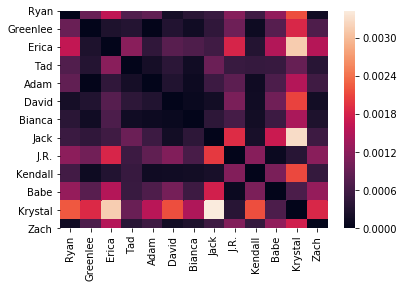

In [246]:
fig = plt.figure()
div = pandas.DataFrame(M, columns = list(actor_network.nodes()), index = list(actor_network.nodes()))
ax = sns.heatmap(div)
plt.show()

Here, I extend the analysis of another soap opera "All My Childen". The network analysis all shows the name appeared in this soap opera (i.e. Ryan, Greelee, David) which gives a high level picture of the people's name inside the opera. Apart from that, based on the most frequent appeared above, it cannot tell what's the core idea of this soap opera since most of the words appeared is pure normal verbal words but what we can tell is that it should be a quite casual life opera (I guess).